# Overfitting and underfitting

## Overfitting

Even when training data and testing data are i.i.d, generalization may also fail.

Is a modeling error which occurs when a function is too closely fit to a limited set of data points.

### Why is overfitting a problem

- Overfitting leads to low training error yet high testing error.

- Out goal is to make the testing error small, Not the training error.

### Plotting a polynomial

- Using a polynomial of degree N to fit $y==\sum^N_{i=1}w_ix_i$

- Higher degree has more complex curve to fit the data.

https://github.com/MSBD-5001/Lecture-Materials/blob/master/l3_simulation_lecture.ipynb

## Underfitting

Occurs when the model or algorithm doesn't fit the the data well enough.

### Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
from scipy i0mport poly1d

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


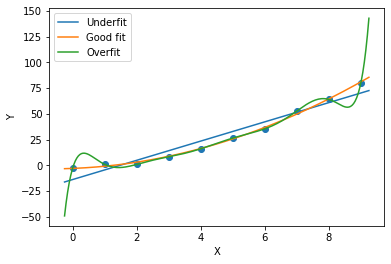

In [3]:
x = np.arange(10)
y = 2*np.random.randn(10) + x**2
xs = np.linspace(-0.25, 9.25, 200)

lin = np.polyfit(x, y, 1)
quad = np.polyfit(x, y, 2)
many = np.polyfit(x, y, 9)

plt.scatter(x, y)
plt.plot(xs, poly1d(lin)(xs))
plt.plot(xs, poly1d(quad)(xs))
plt.plot(xs, poly1d(many)(xs))
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(['Underfit', 'Good fit', 'Overfit']);


## Errors: Bias and variance

Expect error = $Bias^2$ + Variance + Noise

**Bias:** Difference between the average prediction of our model and the correct value which we are trying to predict


**Variance:** The variability of model prediction for a fiven data point.

---

> Our goal is to select models that are of optimal complexity.

Complex models have low bias and high variance:
- Low bias: Complicated models capture a lot of features
- High variance: testing set many not have the same feature
- Overfitting

Simeple models have low variance and high bias.
- Underfitting

### How to reduce variance and keep bias at a low value?

- Larger training dataset reduces variance

- Noise is unavoidable on the data

- Regularization and ensemble learning

# Selecting good models

## Validation

Split training data into training and validation data

- Validation data are only used to evaluate the performance of trained model.

- If model generalize well on validation data, then should also generalize well on testing data.

- Wasting part of original training data.

## Cross validation

> Will make all training data for validation

1. Partition training data into serveral groups

2. repeat: One group as validation set, train new model

3. Performance metric: average error on validation data.

#### k-fold cross validation

- Equally split data into k folds

- Each time uses one fold as validation

- K fold can be used for large dataset

- Leave-one-out can be used when dataset is small. Use only 1 sample for validation, the rest for training.

- Select models with cross-validation. Use cross validation to evaluate performance of different models. Select the best model.

# Improving the models

| Method        | Train sequentially or in parallel | How to generate different models                  | Reduces bias or variance |   |
|---------------|-----------------------------------|---------------------------------------------------|--------------------------|---|
| Bagging       | Parallel                          | Boostrap data                                     | Variance                 |   |
| Random Forest | Parallel                          | Bootsrap + random subset of features at splitting | Variance                 |   |
| Boosting      | Sequential                        | Reweight training data                            | Bias and variance        |   |

## Regularization

Prevent overfitting by reducing flexibility of the model.

Prevent parameters having too large absolute values.
- Reduce variance
- Prevent overfitting

## Ensemeble

Standard decision trees can achieve low bias.
- Training set error can be zero. You can always train to the last branch
- Large variance

Early stopping with fixed nodes or fixed depth may incur high bias

### Averaging

**For regression:** Simply average the results predicted by different trees, can take weighted average

**For classification:** just select the most predicted value.

Also called **voting**

### Baging
> Short for Boostrap aggregating.

Bootstrap samples B times, each with size N, with replacement. Train B classifiers each with a bootstrap sample.

**Bagging gets similar bias: data are from resampling.**

### Random Forest

> Refinement of the bagged trees.

- Problem: We want the trees to be independent, don't want them to be similar. But bootstrapping data doesn't help that much: still drawn from same dataset with all features.

- At each tree split, a random sample of m features are drawn. Only these m features are consldered for splitting.

- Typically, m is $\sqrt{p}$ pr $p/3$ where p is the total number of features.

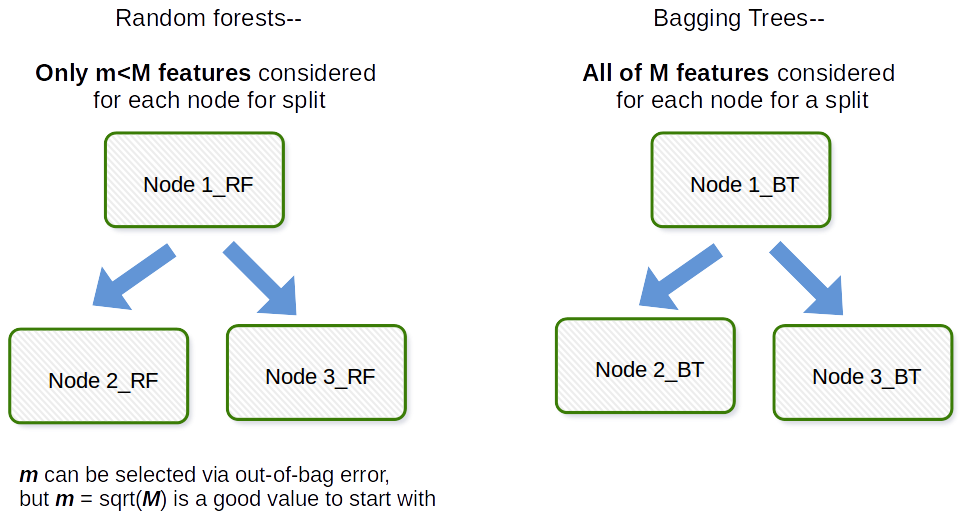

### Boosting

Random forest and bagging: trees are trained in parallel

Boosting: trees should be trained sequentially
- Start with original training sample
    - In each iteration:
        - Train a classifier and check wich samples are hard to train
        - Increase the weight of those mis-classified samples in training data
        - Repeat this
- Final classifier: weighted classifier model.